In [1]:
import sys
sys.path.append('../..')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import seaborn as sns

from scipy import stats

import src.visualizor
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('../../data/processed/data.csv')

C:\Users\marcu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
params = {
    'netflix': {
        'color': '#E24A33',
        'label': 'netflix'
    },
    'amazon': {
        'color': '#348ABD',
        'label': 'amazon'
    },
    'hbo': {
        'color': '#988ED5',
        'label': 'hbo'
    },
    'disney': {
        'color': '#8EBA42',
        'label': 'disney'
    }
}

median_params = {
    'color': '#222222',
    'linestyle': '-',
    'alpha': .6,
    'linewidth': 1.5
}

annotation_params = {
    'fontsize': 16
}

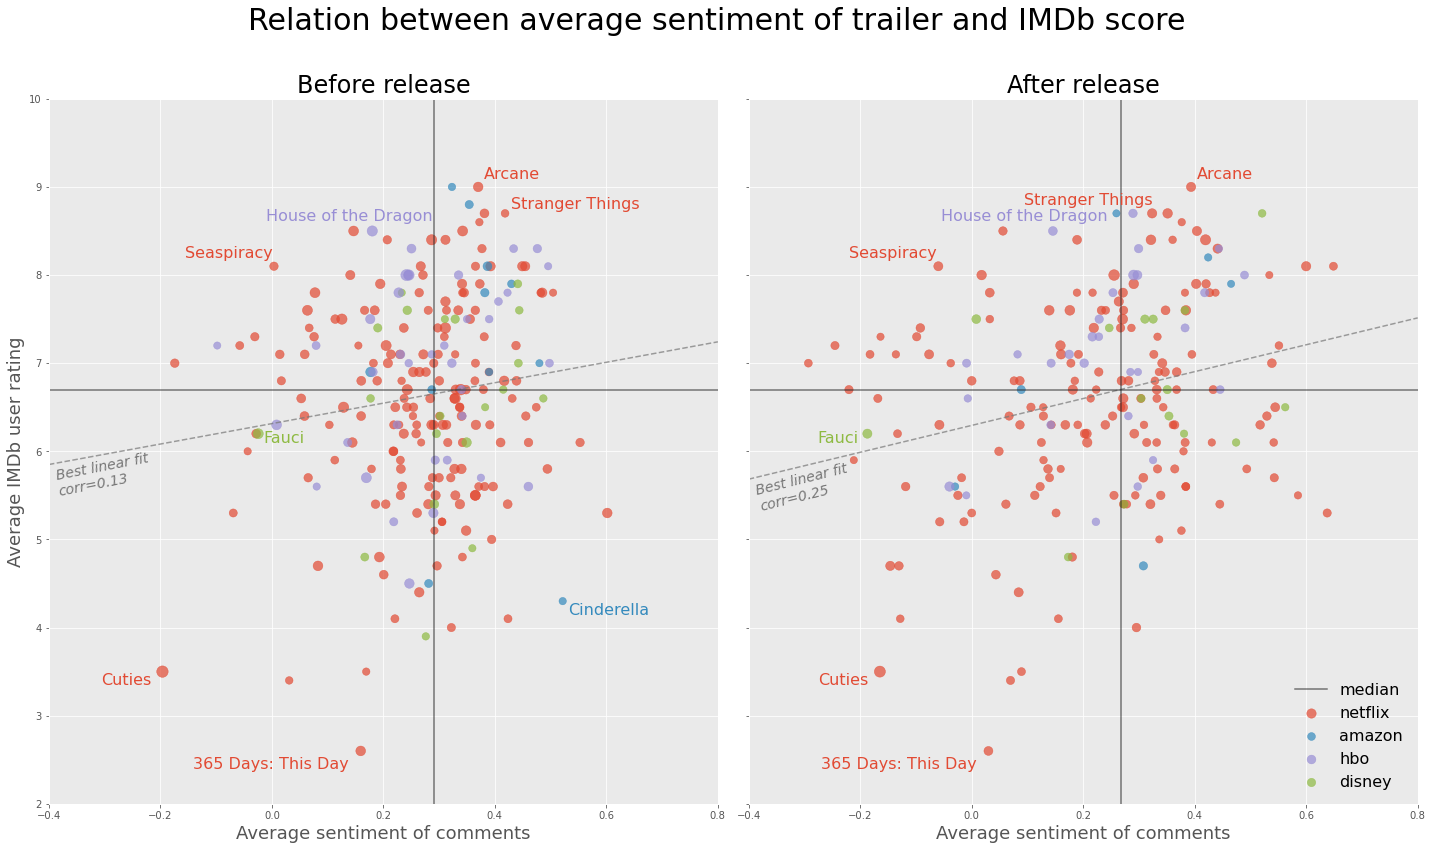

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

fig.suptitle('Relation between average sentiment of trailer and IMDb score\n', fontsize=30)

ax = axes[0]

mask = df.commentDateOffset < 0
mean_scores = df[mask].groupby(['videoId', 'primaryTitle', 'tconst']).agg(
    sentiment=('sentimentPredictedScore', 'mean'),
    imdb_score=('averageRating', 'first'),
    network=('network', 'first'),
    num_comments=('commentId', 'count'),
    comments_since=('commentDateOffset', 'min'),
    titleType=('titleType', 'first')
).reset_index()

mask = (mean_scores.num_comments >= 100)  # & (mean_scores.num_comments >= 100)
X = mean_scores[mask]

reg = LinearRegression()
reg.fit(X.sentiment.to_numpy().reshape(-1, 1), X.imdb_score.to_numpy().reshape(-1, 1))

corr, p_value = pearsonr(X.sentiment, X.imdb_score)

for network in X.network.unique():
    mask = X.network == network
    ax.scatter(X[mask].sentiment, X[mask].imdb_score, s=np.log2(X[mask].num_comments)*8, alpha=.7, **params[network])



ax.set_ylim(2, 10)
ax.set_xlim(-.4, .8)
# ax.set_ylim(1, 10)
# ax.set_xlim(-1, 1)

line_x = np.linspace(-1, 1, 10000)
ax.plot(line_x, reg.predict(line_x.reshape(-1,1)).flatten(), alpha=.7, color='#777777', linestyle='--')
ax.text(-.39, 5.5, f'Best linear fit\ncorr={round(corr,2)}', rotation=11, fontsize=14, fontstyle='italic', color='#777777')

ax.set_xlabel('Average sentiment of comments', fontsize=18)
ax.set_ylabel('Average IMDb user rating', fontsize=18)
ax.set_title('Before release', fontsize=24)



# median lines
ax.axvline(X.sentiment.median(), label='median', **median_params)
ax.axhline(X.imdb_score.median(), **median_params)



# annotations 
# Arcane
annot = X[X.tconst == 'tt11126994'].iloc[0]
ax.text(annot.sentiment + .01, annot.imdb_score + .09, annot.primaryTitle, **params[annot.network], **annotation_params)

# Stranger Things
annot = X[X.tconst == 'tt4574334'].iloc[0]
ax.text(annot.sentiment + .01, annot.imdb_score + .05, annot.primaryTitle, **params[annot.network], **annotation_params)

# Seaspiracy
annot = X[X.tconst == 'tt14152756'].iloc[0]
ax.text(annot.sentiment - .16, annot.imdb_score + .1, annot.primaryTitle, **params[annot.network], **annotation_params)

# 365 Days
annot = X[X.tconst == 'tt12996154'].iloc[0]
ax.text(annot.sentiment - .3, annot.imdb_score - .2, annot.primaryTitle, **params[annot.network], **annotation_params)

# Cinderella
annot = X[X.tconst == 'tt10155932'].iloc[0]
ax.text(annot.sentiment + .01, annot.imdb_score - .15, annot.primaryTitle, **params[annot.network], **annotation_params)

# Cuties
annot = X[X.tconst == 'tt9196192'].iloc[0]
ax.text(annot.sentiment - .11, annot.imdb_score - .15, annot.primaryTitle, **params[annot.network], **annotation_params)

# Fauci
annot = X[X.tconst == 'tt13984924'].iloc[0]
ax.text(annot.sentiment + .01, annot.imdb_score - .1, annot.primaryTitle, **params[annot.network], **annotation_params)

# House of the Dragon
annot = X[X.tconst == 'tt11198330'].iloc[0]
ax.text(annot.sentiment - .19, annot.imdb_score + .12, annot.primaryTitle, **params[annot.network], **annotation_params)










ax = axes[1]

mask = df.commentDateOffset > 0
mean_scores = df[mask].groupby(['videoId', 'primaryTitle', 'tconst']).agg(
    sentiment=('sentimentPredictedScore', 'mean'),
    imdb_score=('averageRating', 'first'),
    network=('network', 'first'),
    num_comments=('commentId', 'count'),
    comments_since=('commentDateOffset', 'min'),
    titleType=('titleType', 'first')
).reset_index()

mask = (mean_scores.num_comments >= 100)  # & (mean_scores.num_comments >= 100)
X = mean_scores[mask]

reg = LinearRegression()
reg.fit(X.sentiment.to_numpy().reshape(-1, 1), X.imdb_score.to_numpy().reshape(-1, 1))

corr, p_value = pearsonr(X.sentiment, X.imdb_score)

for network in X.network.unique():
    mask = X.network == network
    ax.scatter(X[mask].sentiment, X[mask].imdb_score, s=np.log2(X[mask].num_comments)*8, alpha=.7, **params[network])



ax.set_ylim(2, 10)
ax.set_xlim(-.4, .8)
# ax.set_ylim(1, 10)
# ax.set_xlim(-1, 1)

line_x = np.linspace(-1, 1, 10000)
ax.plot(line_x, reg.predict(line_x.reshape(-1,1)).flatten(), alpha=.7, color='#777777', linestyle='--')
ax.text(-.39, 5.33, f'Best linear fit\ncorr={round(corr,2)}', rotation=14, fontsize=14, fontstyle='italic', color='#777777')

ax.set_xlabel('Average sentiment of comments', fontsize=18)
# ax.set_ylabel('Average IMDb user rating', fontsize=18)
ax.set_title('After release', fontsize=24)
ax.set_yticklabels([])



# median lines
ax.axvline(X.sentiment.median(), label='median', **median_params)
ax.axhline(X.imdb_score.median(), **median_params)



# annotations 
# Arcane
annot = X[X.tconst == 'tt11126994'].iloc[0]
ax.text(annot.sentiment + .01, annot.imdb_score + .09, annot.primaryTitle, **params[annot.network], **annotation_params)

# Stranger Things
annot = X[X.tconst == 'tt4574334'].iloc[0]
ax.text(annot.sentiment + -.23, annot.imdb_score + .1, annot.primaryTitle, **params[annot.network], **annotation_params)

# Seaspiracy
annot = X[X.tconst == 'tt14152756'].iloc[0]
ax.text(annot.sentiment - .16, annot.imdb_score + .1, annot.primaryTitle, **params[annot.network], **annotation_params)

# 365 Days
annot = X[X.tconst == 'tt12996154'].iloc[0]
ax.text(annot.sentiment - .3, annot.imdb_score - .2, annot.primaryTitle, **params[annot.network], **annotation_params)

# Cindarella
# annot = X[X.tconst == 'tt10155932'].iloc[0]
# ax.text(annot.sentiment + .01, annot.imdb_score - .1, annot.primaryTitle, **params[annot.network], **annotation_params)


# Cuties
annot = X[X.tconst == 'tt9196192'].iloc[0]
ax.text(annot.sentiment - .11, annot.imdb_score - .15, annot.primaryTitle, **params[annot.network], **annotation_params)

# Fauci
annot = X[X.tconst == 'tt13984924'].iloc[0]
ax.text(annot.sentiment - .09, annot.imdb_score - .1, annot.primaryTitle, **params[annot.network], **annotation_params)

# House of the Dragon
annot = X[X.tconst == 'tt11198330'].iloc[0]
ax.text(annot.sentiment - .2, annot.imdb_score + .12, annot.primaryTitle, **params[annot.network], **annotation_params)

ax.legend(loc='lower right', **annotation_params)

plt.tight_layout()

In [103]:
fig.savefig('../../reports/figs/sentiment_rating_scatter.svg')

In [ ]:
X.corr()